<a href="https://colab.research.google.com/github/KAILAI-Y/inf2178-expdesignfordatascience-w23/blob/main/2178_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
# load data file
# data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
data = pd.read_csv(url)

# Number of rows
# print(df.shape[0])

# drop na row
df = data.dropna(subset=['ArrestID','Age_group__at_arrest_','Perceived_Race','Occurrence_Category'])
# print(df.shape[0])

In [ ]:
dict_for_replace={'Aged 25 to 34 years': '25 - 34', 'Aged 35 to 44 years': '35 - 44', 'Aged 18 to 24 years': '18 - 24', 
                     'Aged 45 to 54 years': '45 - 54', 'Aged 55 to 64 years': '55 - 64', 'Aged 17 years and younger': '17 and under',
                     'Aged 17 years and under': '17 and under', 'Aged 65 years and older': '65 and older', 'Aged 65 and older': '65 and older'}
df.loc[:, 'Age_group__at_arrest_']=df.loc[:, 'Age_group__at_arrest_'].replace(dict_for_replace)
# df

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
df1 = df[["Arrest_Year", "Arrest_Month", "Perceived_Race", "Sex", "Age_group__at_arrest_", "Youth_at_arrest__under_18_years", "StripSearch",'Booked', "Occurrence_Category", "ItemsFound"]]
df1 = df1.dropna(subset = ["Perceived_Race", "Age_group__at_arrest_", "Occurrence_Category"])
df1 = df1.fillna(0)
df1

,Arrest_Year,Arrest_Month,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,StripSearch,Booked,Occurrence_Category,ItemsFound
0,2020,July-Sept,White,M,35 - 44,Not a youth,0,1,Assault & Other crimes against persons,0.0
1,2020,July-Sept,White,M,35 - 44,Not a youth,0,1,Assault & Other crimes against persons,0.0
2,2020,Oct-Dec,Unknown or Legacy,M,35 - 44,Not a youth,0,1,Assault & Other crimes against persons,0.0
3,2021,Jan-Mar,Black,M,25 - 34,Not a youth,0,0,Harassment/Threatening,0.0
4,2021,Jan-Mar,South Asian,M,25 - 34,Not a youth,0,1,FTA/FTC/Compliance Check/Parollee,0.0
...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,Indigenous,F,25 - 34,Not a youth,0,0,Vehicle Related,0.0
65272,2021,Oct-Dec,South Asian,M,35 - 44,Not a youth,0,1,Assault,0.0
65273,2021,Oct-Dec,White,F,45 - 54,Not a youth,0,0,Assault,0.0
65274,2021,Oct-Dec,Unknown or Legacy,M,17 and under,Youth (aged 17 years and under),0,0,Robbery/Theft,0.0


# Plot

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

White                   27407
Black                   17352
Unknown or Legacy        5002
East/Southeast Asian     4388
South Asian              3594
Middle-Eastern           3213
Indigenous               1907
Latino                   1752
Name: Perceived_Race, dtype: int64


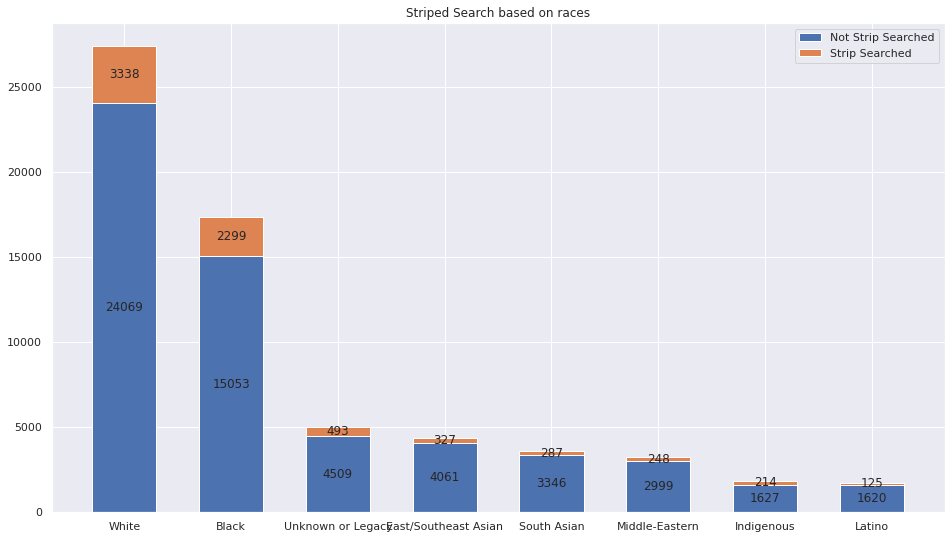

In [ ]:
# race plot
races = df1.Perceived_Race.value_counts().index.tolist()
race_counts = df1.Perceived_Race.value_counts()
print(race_counts)

# total number in each races
grouped_data = df.groupby(["Perceived_Race"])["StripSearch"]
# got the strip search number in each races
Searched = grouped_data.sum().sort_values(ascending = False)

notSearched = (race_counts - Searched).sort_values(ascending = False)

races_counts1 = {
    'Not Strip Searched': notSearched.to_numpy(),
    'Strip Searched': Searched.to_numpy()
}


width = 0.6
fig, ax = plt.subplots(figsize =(16, 9))

bottom = np.zeros(8)
for race, race_count in races_counts1.items():
    p = ax.bar(races, race_count, width, label=race, bottom=bottom)
    bottom += race_count
    ax.bar_label(p, label_type='center')

ax.set_title('Striped Search based on races')
ax.legend()
plt.show()

25 - 34         20725
35 - 44         16072
18 - 24          9934
45 - 54          9003
55 - 64          4553
17 and under     3012
65 and older     1316
Name: Age_group__at_arrest_, dtype: int64


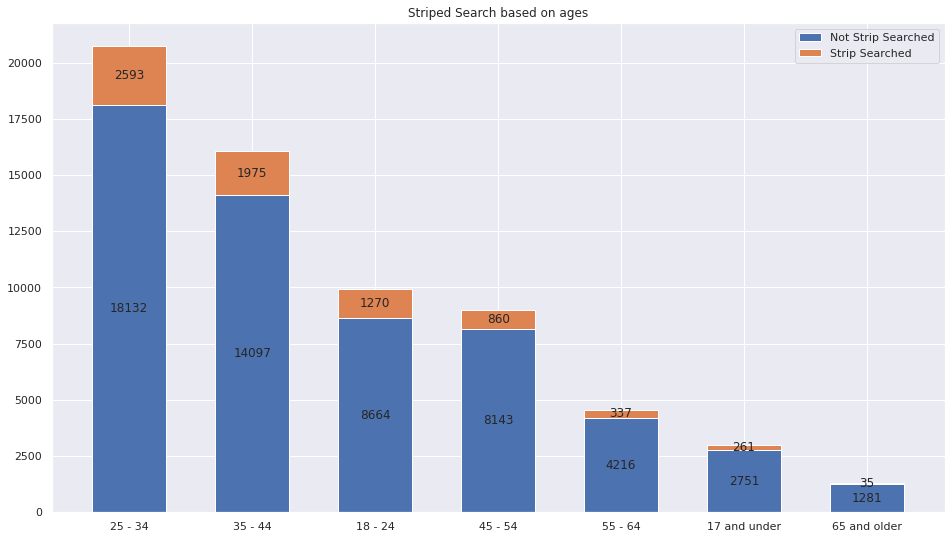

In [ ]:
# age plot
ages = df1.Age_group__at_arrest_.value_counts().index.tolist()
ages_counts = df1.Age_group__at_arrest_.value_counts()
print(ages_counts)

# total number in each age groups
grouped_data = df.groupby(["Age_group__at_arrest_"])["StripSearch"]
# got the strip search number in each age groups
Searched = grouped_data.sum().sort_values(ascending = False)

notSearched = (ages_counts - Searched).sort_values(ascending = False)

ages_counts1 = {
    'Not Strip Searched': notSearched.to_numpy(),
    'Strip Searched': Searched.to_numpy()
}


width = 0.6
fig, ax = plt.subplots(figsize =(16, 9))

bottom = np.zeros(7)
for age, ages_count in ages_counts1.items():
    p = ax.bar(ages, ages_count, width, label=age, bottom=bottom)
    bottom += ages_count
    ax.bar_label(p, label_type='center')

ax.set_title('Striped Search based on ages')
ax.legend()
plt.show()

M    52106
F    12500
U        9
Name: Sex, dtype: int64


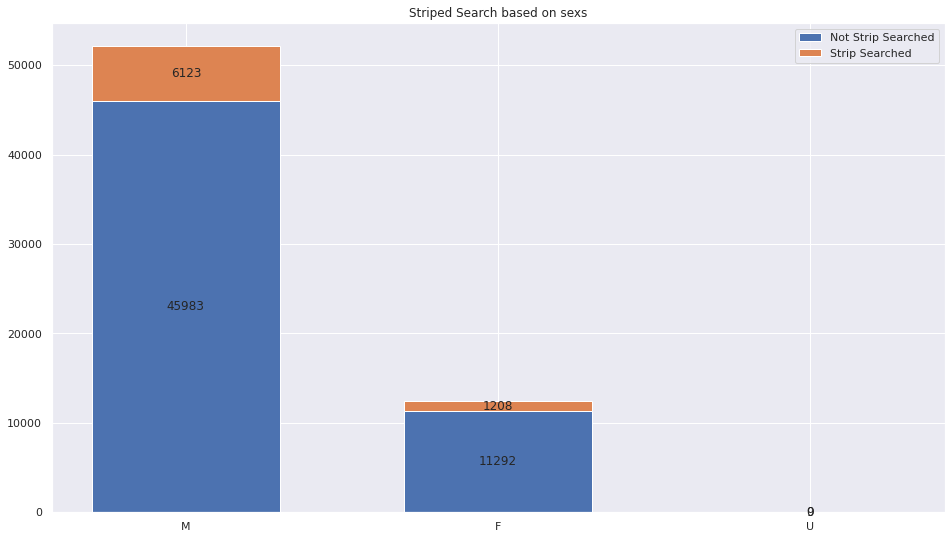

In [ ]:
# sex plot
sexs = df1.Sex.value_counts().index.tolist()
sexs_counts = df1.Sex.value_counts()
print(sexs_counts)

# total number in each sexs groups
grouped_data = df.groupby(["Sex"])["StripSearch"]
# got the strip search number in each sexs
Searched = grouped_data.sum().sort_values(ascending = False)

notSearched = (sexs_counts - Searched).sort_values(ascending = False)

sexs_counts1 = {
    'Not Strip Searched': notSearched.to_numpy(),
    'Strip Searched': Searched.to_numpy()
}


width = 0.6
fig, ax = plt.subplots(figsize =(16, 9))

bottom = np.zeros(3)
for sex, sexs_count in sexs_counts1.items():
    p = ax.bar(sexs, sexs_count, width, label=sex, bottom=bottom)
    bottom += sexs_count
    ax.bar_label(p, label_type='center')

ax.set_title('Striped Search based on sexs')
ax.legend()
plt.show()

# df with categorical varaibles

In [ ]:
df = df1[['Arrest_Year', 'StripSearch', 'Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years']]
df.loc[:, ('Non_White')] = np.where((df.Perceived_Race == 'White'), 0, 1)
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Arrest_Year,StripSearch,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,Non_White
0,2020,0,White,M,35 - 44,Not a youth,0
1,2020,0,White,M,35 - 44,Not a youth,0
2,2020,0,Unknown or Legacy,M,35 - 44,Not a youth,1
3,2021,0,Black,M,25 - 34,Not a youth,1
4,2021,0,South Asian,M,25 - 34,Not a youth,1


1    37208
0    27407
Name: Non_White, dtype: int64


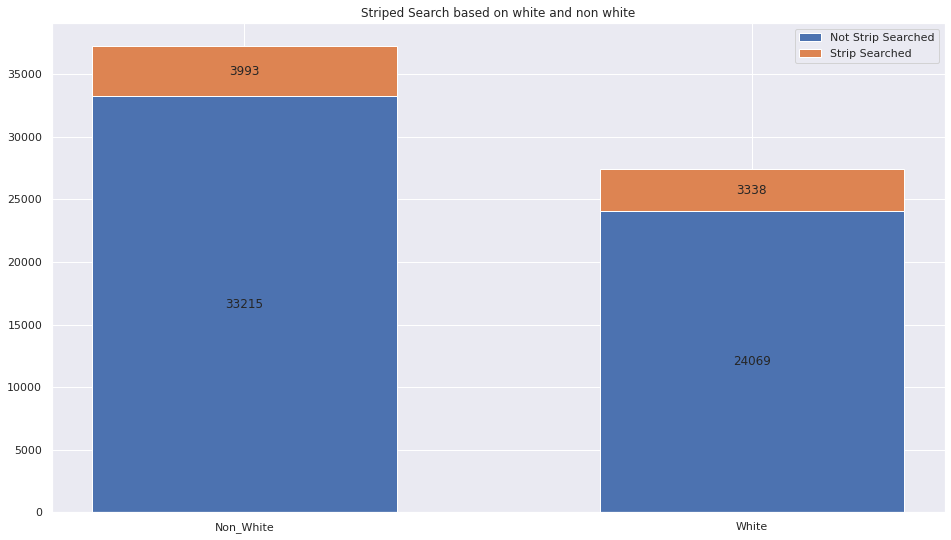

In [ ]:
# white_or_non plot
label = ["Non_White", "White"]
white_or_non_counts = df.Non_White.value_counts()
print(white_or_non_counts)

# total number in each races
grouped_data = df.groupby(["Non_White"])["StripSearch"]
# got the strip search number in each races
Searched = grouped_data.sum().sort_values(ascending = False)

notSearched = (white_or_non_counts - Searched).sort_values(ascending = False)

white_or_non_counts1 = {
    'Not Strip Searched': notSearched.to_numpy(),
    'Strip Searched': Searched.to_numpy()
}


width = 0.6
fig, ax = plt.subplots(figsize =(16, 9))

bottom = np.zeros(2)
for white_or_non, white_or_non_count in white_or_non_counts1.items():
    p = ax.bar(label, white_or_non_count, width, label=white_or_non, bottom=bottom)
    bottom += white_or_non_count
    ax.bar_label(p, label_type='center')

ax.set_title('Striped Search based on white and non white')
ax.legend()
plt.show()

transfer categorical to numerical

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df.loc[:, ('en_Arrest_Year')] = enc.fit_transform(df.loc[:, ('Arrest_Year')]) 
# {2020: 0, 2021: 1}
df.loc[:, ('en_Perceived_Race')] = enc.fit_transform(df.loc[:, ('Perceived_Race')])
# {'White': 7, 'Unknown or Legacy': 6, 'Black': 0, 'South Asian': 5, 'Indigenous': 2, 'Middle-Eastern': 4, 'Latino': 3, 'East/Southeast Asian': 1}
df.loc[:, ('en_Sex')] = enc.fit_transform(df.loc[:, ('Sex')])
# {'M': 1, 'F': 0, 'U': 2}
df.loc[:, ('en_Age_group__at_arrest_')] = enc.fit_transform(df.loc[:, ('Age_group__at_arrest_')])
# {3: '35 - 44', 2: '25 - 34', 4: '45 - 54', 5: '55 - 64', 1: '18 - 24', 6: '65 and older', 0: '17 and under'}
df.loc[:, ('en_Youth_at_arrest__under_18_years')] = enc.fit_transform(df.loc[:, ('Youth_at_arrest__under_18_years')])
# {0: 'Not a youth', 1: 'Youth (aged 17 and younger)', 2: 'Youth (aged 17 years and under)'}
# df.head()
# print(dict(zip(df.en_Age_group__at_arrest_, df.Age_group__at_arrest_)))

df_en = df[['en_Arrest_Year', 'en_Perceived_Race', 'en_Sex', 'en_Age_group__at_arrest_', 'en_Youth_at_arrest__under_18_years']]
df.head()

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,Arrest_Year,StripSearch,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,Non_White,en_Arrest_Year,en_Perceived_Race,en_Sex,en_Age_group__at_arrest_,en_Youth_at_arrest__under_18_years
0,2020,0,White,M,35 - 44,Not a youth,0,0,7,1,3,0
1,2020,0,White,M,35 - 44,Not a youth,0,0,7,1,3,0
2,2020,0,Unknown or Legacy,M,35 - 44,Not a youth,1,0,6,1,3,0
3,2021,0,Black,M,25 - 34,Not a youth,1,1,0,1,2,0
4,2021,0,South Asian,M,25 - 34,Not a youth,1,1,5,1,2,0


# correlation plot

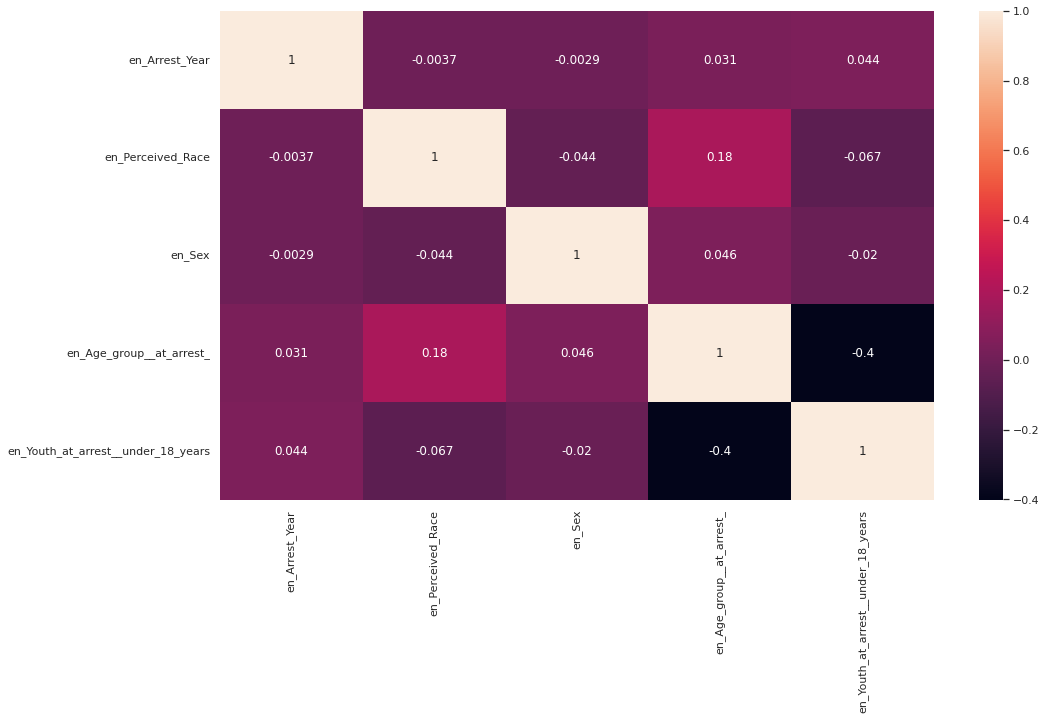

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = df_en.corr()
sns.heatmap(corr,
            annot=True,
            xticklabels=corr.columns,
            yticklabels=corr.columns)
plt.show()

# Grouped data

grouped data with categorical variables

In [ ]:
ca_non_strip_data = df.groupby(['Arrest_Year','Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years', 'Non_White'])['StripSearch'].apply(lambda x: (x == 0).sum()).reset_index() 
ca_non_strip_data = ca_non_strip_data.rename(columns={'StripSearch': 'Non_Search_count'})
ca_strip_data = df.groupby(['Arrest_Year','Perceived_Race', 'Sex', 'Age_group__at_arrest_', 'Youth_at_arrest__under_18_years', 'Non_White'])['StripSearch'].apply(lambda x: (x == 1).sum()).reset_index() 
ca_strip_data = ca_strip_data.rename(columns={'StripSearch': 'Search_count'})


In [ ]:
search_rate = ca_strip_data['Search_count']/(ca_strip_data['Search_count'] + ca_non_strip_data['Non_Search_count']) *100
ca_strip_data['search_rate'] = search_rate
ca_strip_data

,Arrest_Year,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,Non_White,Search_count,search_rate
0,2020,Black,F,17 and under,Youth (aged 17 and younger),1,11,5.641026
1,2020,Black,F,18 - 24,Not a youth,1,75,20.661157
2,2020,Black,F,25 - 34,Not a youth,1,72,14.784394
3,2020,Black,F,35 - 44,Not a youth,1,41,16.803279
4,2020,Black,F,45 - 54,Not a youth,1,28,21.052632
...,...,...,...,...,...,...,...,...
225,2021,White,M,35 - 44,Not a youth,0,102,3.192488
226,2021,White,M,45 - 54,Not a youth,0,20,1.031460
227,2021,White,M,55 - 64,Not a youth,0,11,1.011029
228,2021,White,M,65 and older,Not a youth,0,3,1.020408


# T-Test 

In [ ]:
import pandas as pd
from scipy import stats

## t test 1

In [ ]:
#Hypothesis: white and non white  has the same search rate
#H0: Mean search rate white  = Mean search rate non white
#Ha: Mean search rate white != Mean search rate non white
sample_white = ca_strip_data[ca_strip_data['Non_White'] == 0]['search_rate']
sample_white_non = ca_strip_data[ca_strip_data['Non_White'] == 1]['search_rate']

[Text(1, 0, 'white'), Text(2, 0, 'non white')]

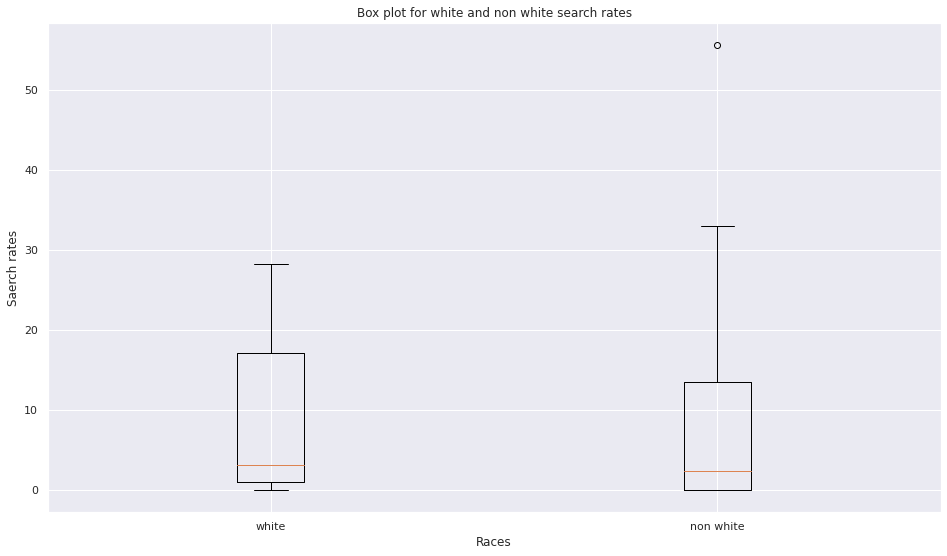

In [ ]:
import matplotlib.pyplot as plt
df_white = sample_white.to_frame()
df_white_non = sample_white_non.to_frame()
fig, ax = plt.subplots(figsize =(16, 9))
ax.boxplot([df_white['search_rate'], df_white_non['search_rate']])
ax.set_xlabel('Races')
ax.set_ylabel('Saerch rates')
ax.set_title('Box plot for white and non white search rates')
ax.set_xticklabels(['white', 'non white'])

In [ ]:
# perform t-test
tstatistic, pvalue = stats.ttest_ind(sample_white, sample_white_non)

# print the results
print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: 0.7246589760865609
p-value: 0.4694042597367569


In [ ]:
# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_white, sample_white_non)

# print the results
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 0.5251306316228227
p-value: 0.4694042597367529


Based on the p-value, which is greater than the common significance level of 0.05, we can not reject the null hypothesis that white and non white  has the same search rate

## t test 2

In [ ]:
#Hypothesis: female and male has the same search rate
#H0: Mean search rate female = Mean search rate male 
#Ha: Mean search rate female != Mean search rate male 
sample_sex_F = ca_strip_data[ca_strip_data['Sex'] == 'F']['search_rate']
sample_sex_M= ca_strip_data[ca_strip_data['Sex'] == 'M']['search_rate']


[Text(1, 0, 'Female'), Text(2, 0, 'Male')]

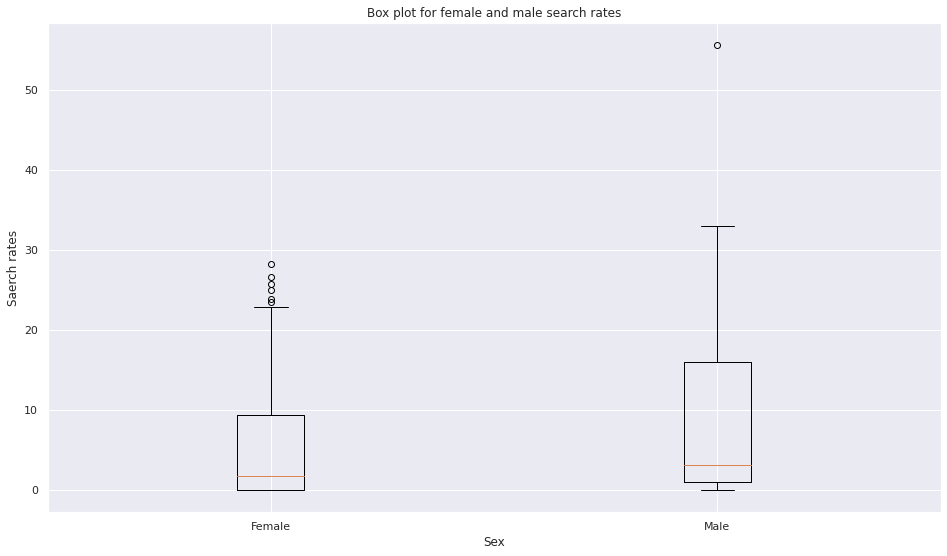

In [ ]:
import matplotlib.pyplot as plt
df_sex_F = sample_sex_F.to_frame()
df_sex_M = sample_sex_M.to_frame()
fig, ax = plt.subplots(figsize =(16, 9))
ax.boxplot([df_sex_F['search_rate'], df_sex_M['search_rate']])
ax.set_xlabel('Sex')
ax.set_ylabel('Saerch rates')
ax.set_title('Box plot for female and male search rates')
ax.set_xticklabels(['Female', 'Male'])

In [ ]:
# perform t-test
tstatistic, pvalue = stats.ttest_ind(sample_sex_F, sample_sex_M)

# print the results
print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: -2.575685017939926
p-value: 0.010656056197281561


In [ ]:
# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_sex_F, sample_sex_M)

# print the results
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 6.634153311640197
p-value: 0.010656056197281464


Based on the p-value, which is smaller than the common significance level of 0.05, we can reject the null hypothesis that female and male has the same search rate

## test 3

In [ ]:
#Hypothesis:  adult and youth has the same search rate
#H0: Mean search rate adult = Mean search rate youth
#Ha: Mean search rate adult != Mean search rate youth
sample_year_not_youth = ca_strip_data[(ca_strip_data['Youth_at_arrest__under_18_years'] == 'Not a youth')]['search_rate']
sample_year_youth = ca_strip_data[(ca_strip_data['Youth_at_arrest__under_18_years'] != 'Not a youth')]['search_rate']

[Text(1, 0, 'Adult'), Text(2, 0, 'Youth')]

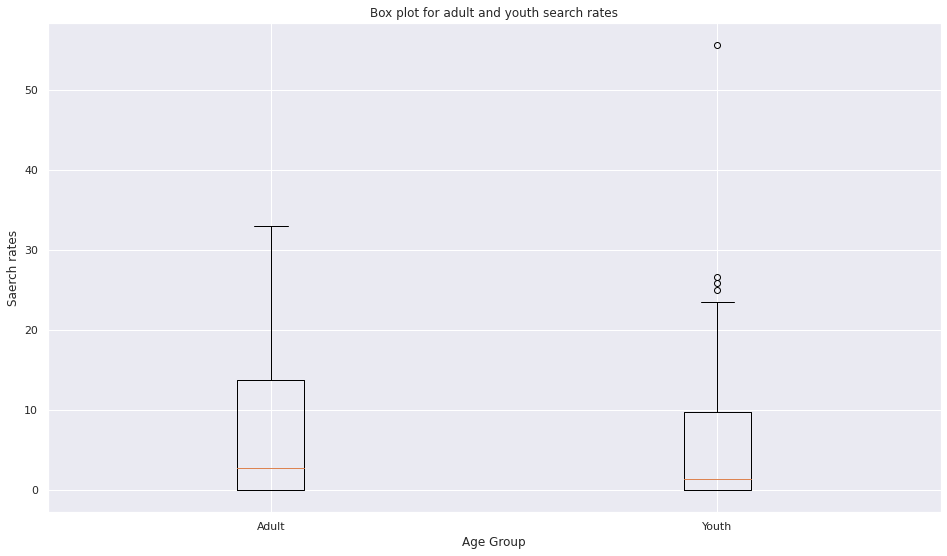

In [ ]:
import matplotlib.pyplot as plt
df_not_youth = sample_year_not_youth.to_frame()
df_youth = sample_year_youth.to_frame()
fig, ax = plt.subplots(figsize =(16, 9))
ax.boxplot([df_not_youth['search_rate'], df_youth['search_rate']])
ax.set_xlabel('Age Group')
ax.set_ylabel('Saerch rates')
ax.set_title('Box plot for adult and youth search rates')
ax.set_xticklabels(['Adult', 'Youth'])

In [ ]:
# perform t-test
tstatistic, pvalue = stats.ttest_ind(sample_year_not_youth, sample_year_youth)

# print the results
print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: -0.1936989163956314
p-value: 0.8465840952362469


In [ ]:
# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_year_not_youth, sample_year_youth)

# print the results
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 0.03751927021284174
p-value: 0.8465840952362751


Based on the p-value, which is greater than the common significance level of 0.05, we can reject the null hypothesis that adult and youth has the same search rate

## t test 4

In [ ]:
#Hypothesis:  white female and white male has the same search rate
#H0: Mean search rate white female = Mean search rate white male 
#Ha: Mean search rate white female != Mean search rate white male 
sample_white_female= ca_strip_data[(ca_strip_data['Non_White'] == 0) & (ca_strip_data['Sex'] == 'F')]['search_rate']
sample_white_male = ca_strip_data[(ca_strip_data['Non_White'] == 0) & (ca_strip_data['Sex'] == 'M')]['search_rate']

[Text(1, 0, 'white female'), Text(2, 0, 'white male')]

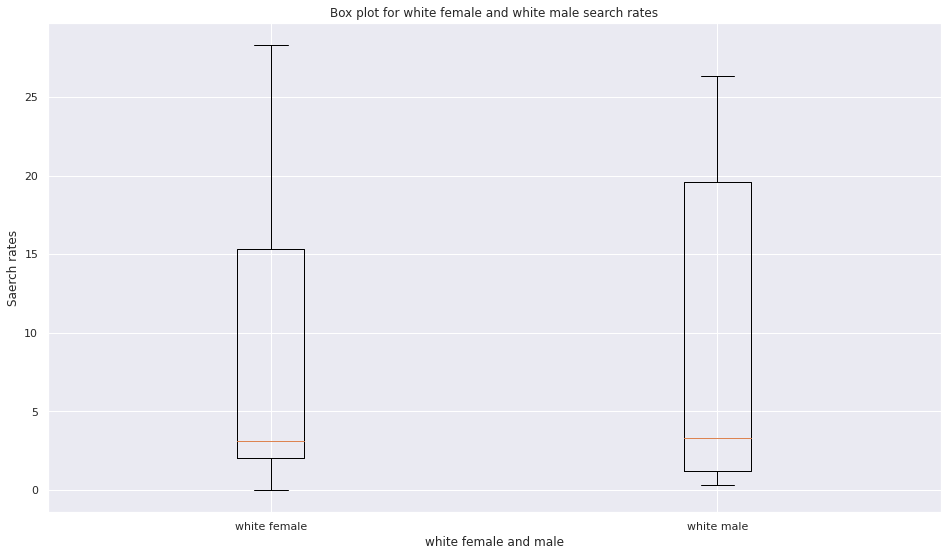

In [ ]:
import matplotlib.pyplot as plt
df_white_female = sample_white_female.to_frame()
df_white_male = sample_white_male.to_frame()
fig, ax = plt.subplots(figsize =(16, 9))
ax.boxplot([df_white_female ['search_rate'], df_white_male['search_rate']])
ax.set_xlabel('white female and male')
ax.set_ylabel('Saerch rates')
ax.set_title('Box plot for white female and white male search rates')
ax.set_xticklabels(['white female', 'white male'])

In [ ]:
# perform t-test
tstatistic, pvalue = stats.ttest_ind(sample_white_female, sample_white_male)

# print the results
print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: -0.3078998597138327
p-value: 0.760611664046764


In [ ]:
# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_2020, sample_2021)

# print the results
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 0.09480232361179801
p-value: 0.7606116640467631


Based on the p-value, which is greater than the common significance level of 0.05, we can reject the null hypothesis that white female and white male has the same search rate

## t test 5

In [ ]:
#Hypothesis:  white and black has the same search rate
#H0: Mean search rate white = Mean search rate black
#Ha: Mean search rate white != Mean search rate black
sample_white = ca_strip_data[ca_strip_data['Perceived_Race'] == 'White']['search_rate']
sample_black = ca_strip_data[ca_strip_data['Perceived_Race'] == 'Black']['search_rate']

[Text(1, 0, 'white'), Text(2, 0, 'black')]

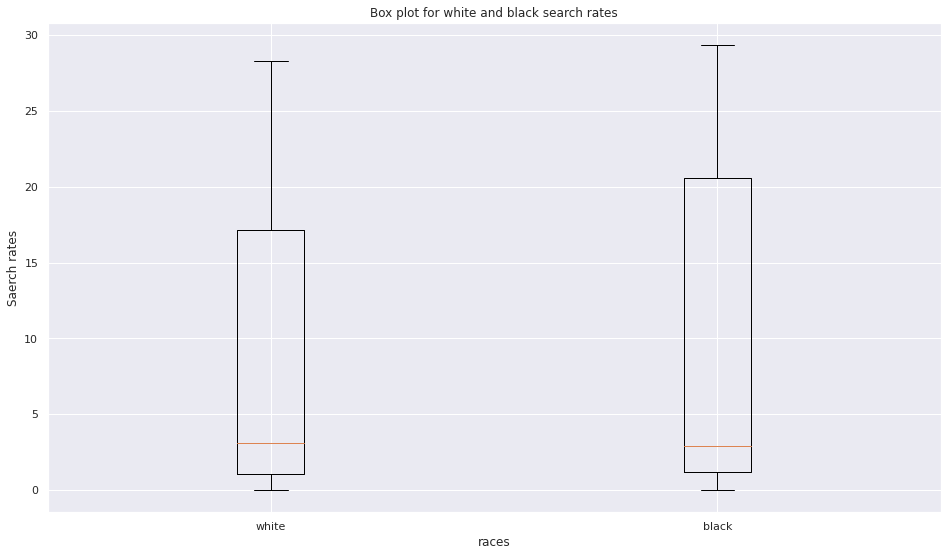

In [ ]:
import matplotlib.pyplot as plt
df_white = sample_white.to_frame()
df_black = sample_black.to_frame()
fig, ax = plt.subplots(figsize =(16, 9))
ax.boxplot([df_white['search_rate'], df_black['search_rate']])
ax.set_xlabel('races')
ax.set_ylabel('Saerch rates')
ax.set_title('Box plot for white and black search rates')
ax.set_xticklabels(['white', 'black'])

In [ ]:
# perform t-test
tstatistic, pvalue = stats.ttest_ind(sample_white, sample_black)

# print the results
print("t-statistic:", tstatistic)
print("p-value:", pvalue)

t-statistic: -0.4515601238010063
p-value: 0.6532994129721228


In [ ]:
# perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(sample_white, sample_black)

# print the results
print("f-statistic:", f_statistic)
print("p-value:", p_value)

f-statistic: 0.2039065454071803
p-value: 0.6532994129721241


Based on the p-value, which is greater than the common significance level of 0.05, we can reject the null hypothesis that white and black has the same search rate

# tukey hsd

In [ ]:
#1 way anova with tukey hsd
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
tukey = pairwise_tukeyhsd(endog=ca_strip_data['search_rate'], groups=ca_strip_data['Sex'], alpha=0.05)

print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     F      M   3.2094  0.026   0.3087  6.1101   True
     F      U  -5.8975 0.2278 -14.3377  2.5427  False
     M      U  -9.1068 0.0309 -17.5448 -0.6689   True
-----------------------------------------------------


In [ ]:
# we will use bioinfokit (v1.0.3 or later) for performing tukey HSD test
# check documentation here https://github.com/reneshbedre/bioinfokit
!pip install bioinfokit
from bioinfokit.analys import stat

In [ ]:
# perform multiple pairwise comparison (Tukey HSD)
# unequal sample size data, tukey_hsd uses Tukey-Kramer test
res = stat()
res.tukey_hsd(df=ca_strip_data, res_var='search_rate', xfac_var='Perceived_Race', anova_model='search_rate ~ C(Perceived_Race)+C(Arrest_Year)+C(Perceived_Race):C(Arrest_Year)')
res.tukey_summary
# output

/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,Black,East/Southeast Asian,4.511982,-0.689241,9.713205,3.755408,0.142166
1,Black,Indigenous,2.426062,-2.775161,7.627285,2.019257,0.824285
2,Black,Latino,3.119559,-2.081665,8.320782,2.596467,0.582866
3,Black,Middle-Eastern,4.740543,-0.460680,9.941766,3.945644,0.102984
4,Black,South Asian,4.540926,-0.660297,9.742149,3.779499,0.136510
5,Black,Unknown or Legacy,2.988863,-2.084964,8.062690,2.550149,0.602237
6,Black,White,1.192165,-3.881662,6.265992,1.017176,0.900000
7,East/Southeast Asian,Indigenous,6.938044,1.736821,12.139267,5.774665,0.001595
8,East/Southeast Asian,Latino,1.392424,-3.808799,6.593647,1.158941,0.900000
9,East/Southeast Asian,Middle-Eastern,0.228561,-4.972662,5.429784,0.190236,0.900000


In [ ]:
res.tukey_hsd(df=ca_strip_data, res_var='search_rate', xfac_var='Arrest_Year', anova_model='search_rate ~ C(Perceived_Race) + C(Arrest_Year) + C(Perceived_Race):C(Arrest_Year)')
res.tukey_summary
# output


/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,2020,2021,12.471741,10.819083,14.124399,21.036346,0.001


In [ ]:
res.tukey_hsd(df=ca_strip_data, res_var='search_rate', xfac_var=['Perceived_Race','Arrest_Year'], anova_model='search_rate ~ C(Perceived_Race) + C(Arrest_Year) + C(Perceived_Race):C(Arrest_Year)')
res.tukey_summary.head()
# output


/usr/local/lib/python3.8/dist-packages/bioinfokit/analys.py:368: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[(ele1, ele2)] = df[(df[xfac_var[0]] == ele1) &


,group1,group2,Diff,Lower,Upper,q-value,p-value
0,"(Black, 2020)","(Black, 2021)",16.340336,8.008030,24.672643,9.616914,0.001000
1,"(Black, 2020)","(East/Southeast Asian, 2020)",8.420506,0.088200,16.752812,4.955790,0.044764
2,"(Black, 2020)","(East/Southeast Asian, 2021)",16.943795,8.611488,25.276101,9.972072,0.001000
3,"(Black, 2020)","(Indigenous, 2020)",5.279076,-3.053231,13.611382,3.106938,0.671650
4,"(Black, 2020)","(Indigenous, 2021)",16.767288,8.434981,25.099594,9.868191,0.001000


# Two-way Anova

## race & year -> search count

<AxesSubplot:xlabel='Perceived_Race', ylabel='search_rate'>

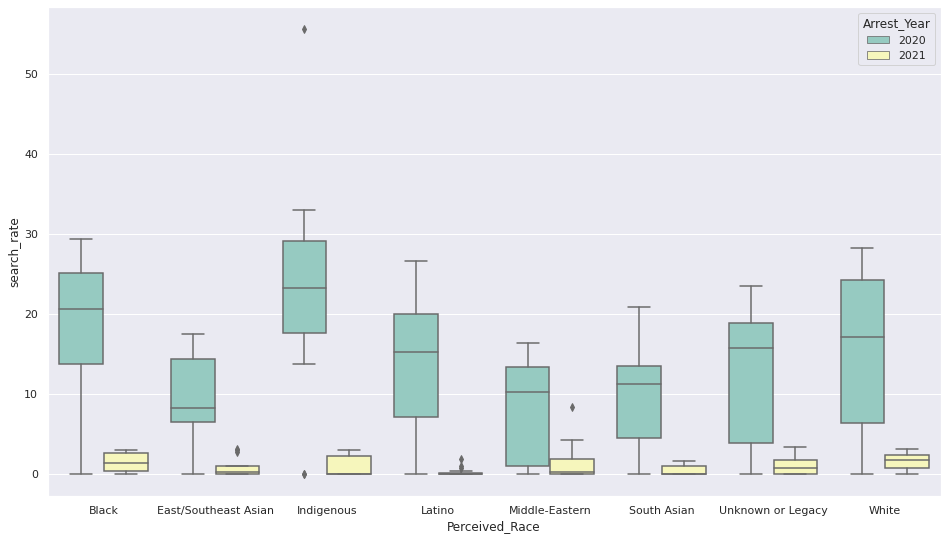

In [ ]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,9)})
sns.boxplot(x="Perceived_Race", y="search_rate", hue="Arrest_Year", data=ca_strip_data, palette="Set3") 

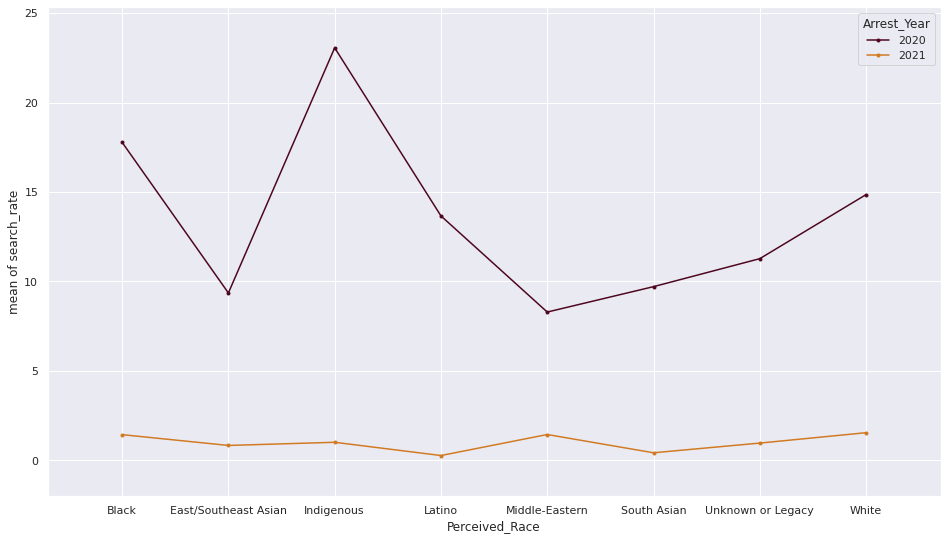

In [ ]:
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
fig = interaction_plot(x=ca_strip_data['Perceived_Race'], trace=ca_strip_data['Arrest_Year'], response=ca_strip_data['search_rate'], 
    colors=['#4c061d','#d17a22'])
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model_year_race = ols('search_rate ~ C(Perceived_Race) + C(Arrest_Year) + C(Perceived_Race):C(Arrest_Year)', data=ca_strip_data).fit()
anova_table_year_race = sm.stats.anova_lm(model_year_race, typ=2)
anova_table_year_race

,sum_sq,df,F,PR(>F)
C(Perceived_Race),1297.575355,7.0,4.586232,8.520835e-05
C(Arrest_Year),8951.400772,1.0,221.468752,7.362095e-35
C(Perceived_Race):C(Arrest_Year),1195.590896,7.0,4.225772,2.175314e-04
Residual,8649.526164,214.0,NaN,NaN


## sex & year -> search count

<AxesSubplot:xlabel='Sex', ylabel='Search_count'>

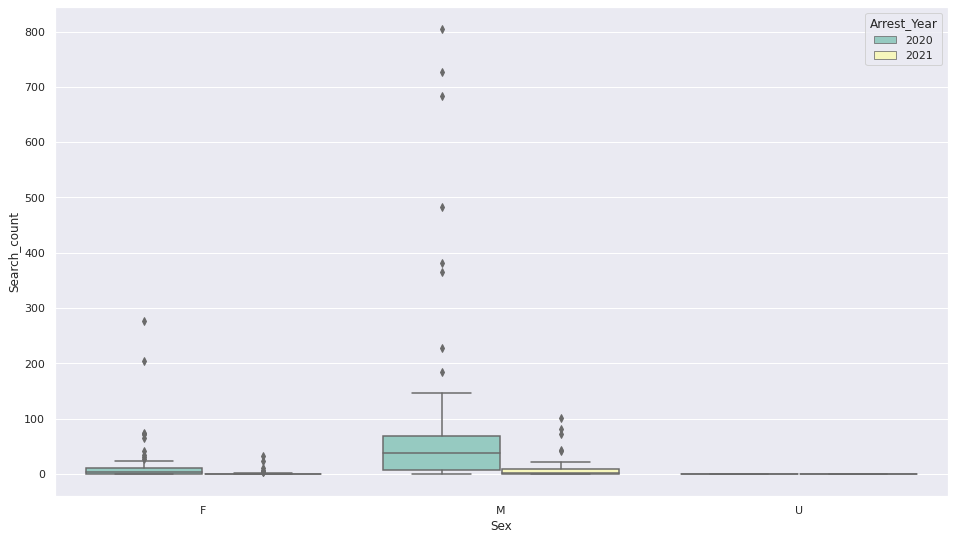

In [ ]:
sns.boxplot(x="Sex", y="Search_count", hue="Arrest_Year", data=ca_strip_data, palette="Set3") 

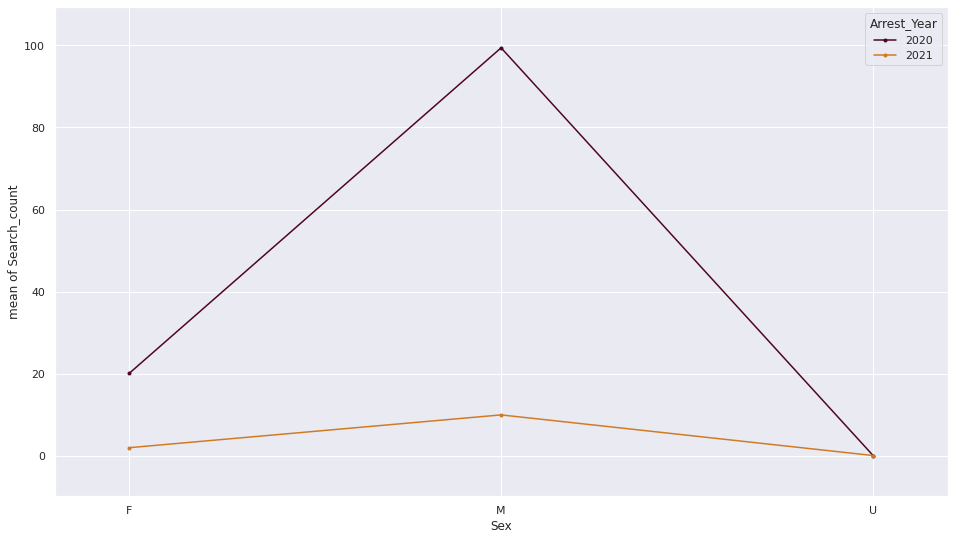

In [ ]:
fig = interaction_plot(x=ca_strip_data['Sex'], trace=ca_strip_data['Arrest_Year'], response=ca_strip_data['Search_count'], 
    colors=['#4c061d','#d17a22'])
plt.show()

In [ ]:
model_year_sex = ols('Search_count ~ C(Sex) + C(Arrest_Year) + C(Sex):C(Arrest_Year)', data=ca_strip_data).fit()
anova_table_year_sex = sm.stats.anova_lm(model_year_sex, typ=2)
anova_table_year_sex

,sum_sq,df,F,PR(>F)
C(Sex),1.189820e+05,2.0,6.809750,0.001346
C(Arrest_Year),1.583475e+05,1.0,18.125548,0.000030
C(Sex):C(Arrest_Year),7.512693e+04,2.0,4.299773,0.014709
Residual,1.956898e+06,224.0,NaN,NaN


## sex & races -> search count

<AxesSubplot:xlabel='Perceived_Race', ylabel='Search_count'>

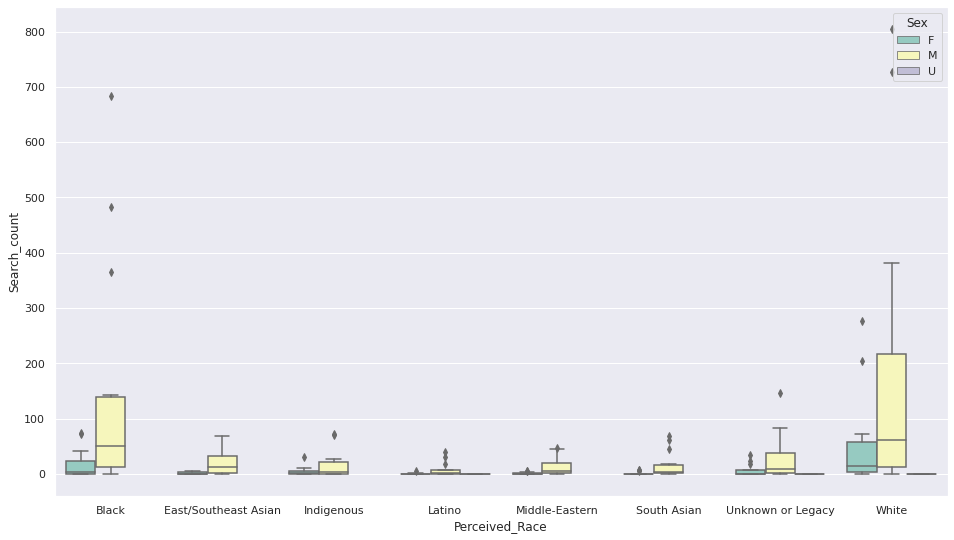

In [ ]:
sns.boxplot(x="Perceived_Race", y="Search_count", hue="Sex", data=ca_strip_data, palette="Set3") 

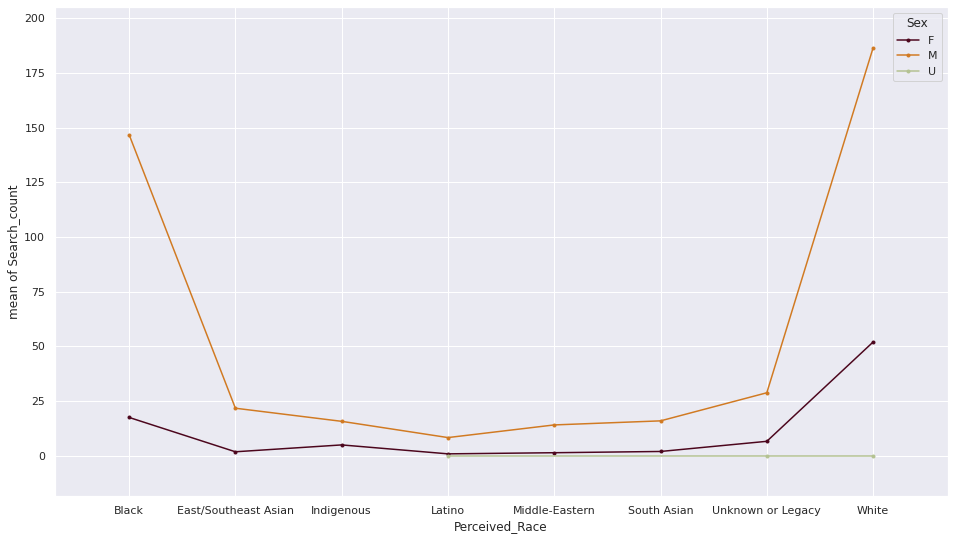

In [ ]:
fig = interaction_plot(x=ca_strip_data['Perceived_Race'], trace=ca_strip_data['Sex'], response=ca_strip_data['Search_count'], 
    colors=['#4c061d','#d17a22', '#b4c292'])
plt.show()

In [ ]:
model_sex_races = ols('Search_count ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=ca_strip_data).fit()
anova_table_sex_races = sm.stats.anova_lm(model_sex_races, typ=2)
anova_table_sex_races

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Perceived_Race),5.045575e+05,7.0,9.064285,0.000011
C(Sex),4.811451e+04,2.0,3.025290,0.050655
C(Perceived_Race):C(Sex),2.399798e+05,14.0,2.155597,0.021739
Residual,1.677883e+06,211.0,NaN,NaN
